![bookstore](bookstore.jpg)

Identifying popular products is incredibly important for e-commerce companies! Popular products generate more revenue and, therefore, play a key role in stock control.

You've been asked to support an online bookstore by building a model to predict whether a book will be popular or not. They've supplied you with an extensive dataset containing information about all books they've sold, including:

* `price`
* `popularity` (target variable)
* `review/summary`
* `review/text`
* `review/helpfulness`
* `authors`
* `categories`

You'll need to build a model that predicts whether a book will be rated as popular or not.

They have high expectations of you, so have set a target of at least 70% accuracy! You are free to use as many features as you like, and will need to engineer new features to achieve this level of performance.

Help the online bookstore identify their bestsellers.

- Create a binary classification model to predict whether a book is rated as "Popular" or "Unpopular", achieving an accuracy score of over 70%.
- The final output should be a variable called model_accuracy with a value of over 0.7.

In [192]:
# Import some required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the dataset
books = pd.read_csv("data/books.csv")

# Preview the first five rows
books.head()

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular


In [193]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15719 entries, 0 to 15718
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               15719 non-null  object 
 1   price               15719 non-null  float64
 2   review/helpfulness  15719 non-null  object 
 3   review/summary      15718 non-null  object 
 4   review/text         15719 non-null  object 
 5   description         15719 non-null  object 
 6   authors             15719 non-null  object 
 7   categories          15719 non-null  object 
 8   popularity          15719 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


## Data Preprocessing

In [194]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### handling missing value

In [195]:
missing_values_counts = books.isnull().sum()
missing_values_counts

title                 0
price                 0
review/helpfulness    0
review/summary        1
review/text           0
description           0
authors               0
categories            0
popularity            0
dtype: int64

In [196]:
books_null = books.loc[books['review/summary'].isnull()]
books_null

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity
12118,"Eldest (Inheritance, Book 2)",33.97,0/0,NaN,This book was outstanding! The best part was t...,"After successfully evading an Urgals ambush, E...",'Christopher Paolini','Juvenile Fiction',Popular


In [197]:
books = books.dropna(subset=['review/summary'])

### Lower case

In [198]:
def lowercase(text: str):
    return text.lower()


INPUT_TEXT = "The cat's toys are scattered everywhere!"
lowercase(INPUT_TEXT)

"the cat's toys are scattered everywhere!"

### Punctuation Removal

In [199]:
def punctuation_removal(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


INPUT_TEXT = "The cat's toys are scattered everywhere!"
INPUT_TEXT = lowercase(INPUT_TEXT)
punctuation_removal(INPUT_TEXT)

'the cats toys are scattered everywhere'

### Tokenize

In [200]:
def tokenize(text):
    return text.split()


INPUT_TEXT = "The cat's toys are scattered everywhere!"
INPUT_TEXT = lowercase(INPUT_TEXT)
INPUT_TEXT = punctuation_removal(INPUT_TEXT)
tokenize(INPUT_TEXT)

['the', 'cats', 'toys', 'are', 'scattered', 'everywhere']

### Remove Stopword

In [201]:
def remove_stopwords(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    return [token for token in tokens if token not in stop_words]


INPUT_TEXT = "The cat's toys are scattered everywhere!"
INPUT_TEXT = lowercase(INPUT_TEXT)
INPUT_TEXT = punctuation_removal(INPUT_TEXT)
tokens = tokenize(INPUT_TEXT)
remove_stopwords(tokens)

['cats', 'toys', 'scattered', 'everywhere']

### Stemming

In [202]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('omw-1.4')  # Để hỗ trợ tiếng Anh mở rộng
nltk.download('punkt')  # Để phân tách từ


def lemmatization(tokens):
    # Khởi tạo Lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Áp dụng lemmatization cho từng từ
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence


INPUT_TEXT = "The cat's toys are scattered everywhere!"
INPUT_TEXT = lowercase(INPUT_TEXT)
INPUT_TEXT = punctuation_removal(INPUT_TEXT)
tokens = tokenize(INPUT_TEXT)
tokens = remove_stopwords(tokens)
lemmatization(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'cat toy scattered everywhere'

In [203]:
def preprocess_text(text):
    text = lowercase(text)
    text = punctuation_removal(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatization(tokens)

    return tokens


INPUT_TEXT = "The cat's toys are scattered everywhere!"
preprocess_text(INPUT_TEXT)

'cat toy scattered everywhere'

In [204]:
books['categories'] = books['categories'].apply(preprocess_text)
books['review/summary'] = books['review/summary'].apply(preprocess_text)
books['review/text'] = books['review/text'].apply(preprocess_text)

In [205]:
cate_counts = books['categories'].value_counts()
cate_counts = cate_counts.loc[cate_counts == 1]
cate_counts

categories
behavior disorder child                   1
classical drama                           1
detective mystery comic book strip etc    1
conduct life                              1
child rearing                             1
                                         ..
motherhood                                1
notetaking                                1
child                                     1
colombo sri lanka                         1
asthma                                    1
Name: count, Length: 112, dtype: int64

### Preprocesing categories

In [206]:
import re

# Hàm để hợp nhất các giá trị chứa 'science', 'fiction', 'book', 'story', và năm thành các giá trị tương ứng
def clean_category(category):
    # Kiểm tra và thay thế các giá trị chứa 4 chữ số (năm) thành 'history'
    if re.search(r'\d{4,}', category):
        return 'history'

    # Kiểm tra và thay thế các giá trị chứa 'science'
    elif re.search(r'\b\w*\s*science\b', category, flags=re.IGNORECASE):
        return 'science'

    # Kiểm tra và thay thế các giá trị chứa 'fiction'
    elif re.search(r'\b\w*\s*fiction\b', category, flags=re.IGNORECASE):
        return 'fiction'

    # Kiểm tra và thay thế các giá trị chứa 'book' hoặc 'books'
    elif re.search(r'\bbook(s)?\b', category, flags=re.IGNORECASE):
        return 'book'

    # Kiểm tra và thay thế các giá trị chứa 'story' hoặc 'stories'
    elif re.search(r'\b\w*\s*story\b', category, flags=re.IGNORECASE):
        return 'story'

    # Trả về category ban đầu nếu không thuộc các điều kiện trên
    return category


# Áp dụng hàm vào cột 'category'
books['cleaned_categories'] = books['categories'].apply(clean_category)

# Kiểm tra kết quả sau khi làm sạch
books['cleaned_categories'].value_counts()

cleaned_categories
fiction                                4774
religion                               1053
biography autobiography                 853
story                                   795
business economics                      707
                                       ... 
dalziel andrew fictitious character       1
childrens poetry english                  1
mormon church                             1
turning lathe work                        1
asthma                                    1
Name: count, Length: 274, dtype: int64

In [207]:
# Tính toán value_counts cho cột 'cleaned_categories'
category_counts = books['cleaned_categories'].value_counts()

# Tìm các category có tần suất xuất hiện nhỏ hơn 8
categories_to_replace = category_counts[category_counts <= 8].index

# Thay thế các category có tần suất nhỏ hơn 8 bằng 'Other'
books['cleaned_categories'] = books['cleaned_categories'].apply(
    lambda x: 'Other' if x in categories_to_replace else x
)

# Hiển thị kết quả sau khi thay thế
books['cleaned_categories'].value_counts()

cleaned_categories
fiction                    4774
religion                   1053
biography autobiography     853
story                       795
business economics          707
science                     678
computer                    514
family relationship         488
Other                       447
health fitness              414
cooking                     399
body mind spirit            360
music                       306
selfhelp                    263
sport recreation            245
education                   214
psychology                  206
humor                       177
craft hobby                 173
nature                      148
language art discipline     145
philosophy                  145
performing art              136
pet                         125
foreign language study      124
poetry                      114
comic graphic novel         113
art                         108
travel                      105
reference                   102
transportation       

### Preprocessing review/helpfulness : Mình nghĩ chỉ cần lấy review là được rồi , tại đây là review tốt mà , nên nó càng cao thì càng tốt

In [208]:
# Tách giá trị X từ chuỗi 'X/Y' (chỉ lấy phần trước dấu '/')
books['helpful'] = books['review/helpfulness'].str.split('/').str[0]

# Chuyển X sang kiểu số
books['helpful'] = pd.to_numeric(books['helpful'])

In [209]:
books['helpful'].describe()

count    15718.000000
mean         5.945413
std         15.358081
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max        519.000000
Name: helpful, dtype: float64

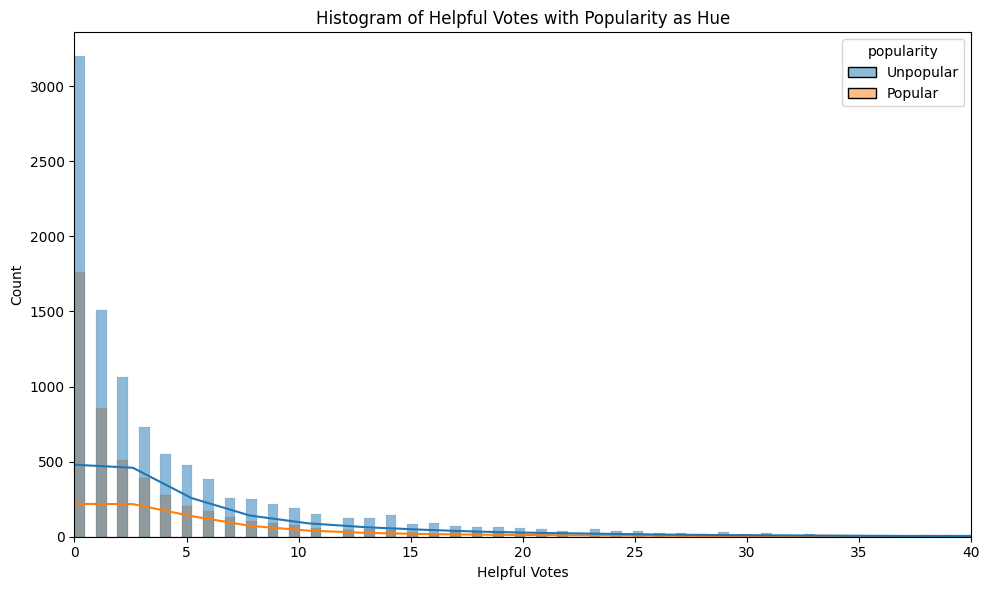

In [210]:
# Tạo biểu đồ histplot cho cột 'helpful' với hue là 'popularity'
plt.figure(figsize=(10, 6))
sns.histplot(data=books, x='helpful', hue='popularity', kde=True)

# Giới hạn trục x trong khoảng từ 0 đến 100
plt.xlim(0, 40)

# Tùy chỉnh biểu đồ
plt.title('Histogram of Helpful Votes with Popularity as Hue')
plt.xlabel('Helpful Votes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [211]:
books.loc[(books['popularity'] == 'Popular') & (books['helpful'] == 0)].describe()

,price,helpful
count,1766.000000,1766.0
mean,14.899632,0.0
std,7.955216,0.0
min,1.000000,0.0
25%,10.190000,0.0
50%,12.905000,0.0
75%,18.950000,0.0
max,41.530000,0.0


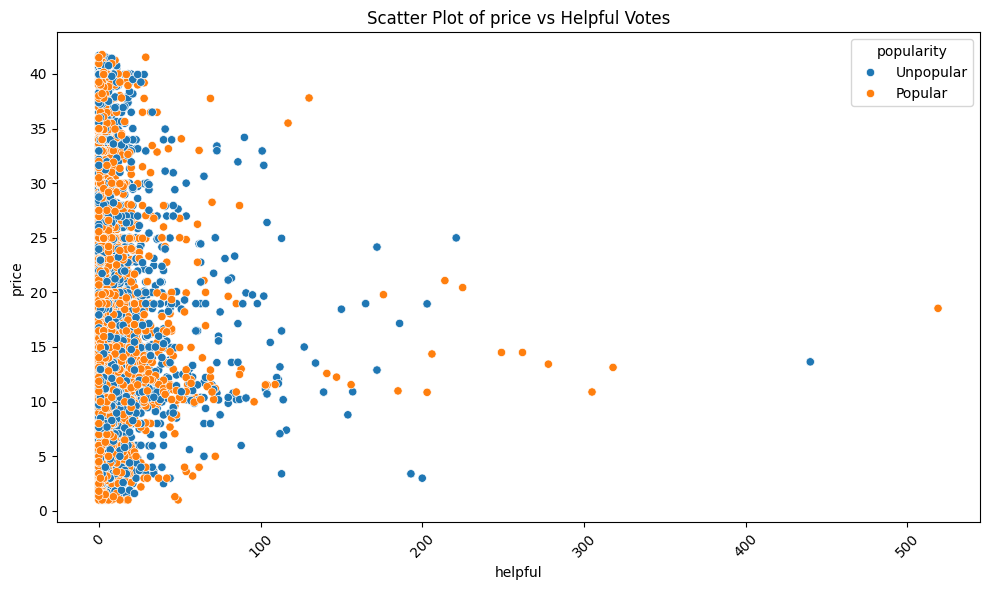

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ scatter plot cho 'popularity' và 'helpful'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=books, x='helpful', y='price', hue='popularity')

# Tùy chỉnh biểu đồ
plt.title('Scatter Plot of price vs Helpful Votes')
plt.xlabel('helpful')
plt.ylabel('price')
plt.xticks(rotation=45)  # Xoay nhãn trên trục x để dễ đọc hơn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [213]:
# Lọc các hàng có 'helpful' > 200 và 'popularity' là 'Unpopular'
condition = (books['helpful'] > 200) & (books['popularity'] == 'Unpopular')

# Loại bỏ các hàng này khỏi DataFrame
books = books.loc[~condition]  # Dùng ~ để phủ định điều kiện

# Kiểm tra kết quả sau khi loại bỏ
books

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,cleaned_categories,helpful
0,We Band of Angels: The Untold Story of America...,10.88,2/3,great book woman wwii,alway fan fiction book set ww2even though sure...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman',history,Unpopular,story,2
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,helpful book church prayer group,helpful book give better prayer life brings cl...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho',religion,Unpopular,religion,0
2,The Mystical Journey from Jesus to Christ,24.95,17/19,universal spiritual awakening guide radical ap...,message book find self without separation ever...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',body mind spirit,Unpopular,body mind spirit,17
3,Death Row,7.99,0/1,ben kincaid try stop execution,hero william bernhardt ben kincaid novel socia...,"Upon receiving his execution date, one of the ...",'Lynden Harris',social science,Unpopular,science,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction modern prosody,there lot book reader see repeated book prosod...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",poetry,Unpopular,poetry,18
...,...,...,...,...,...,...,...,...,...,...,...
15714,Attack of the Deranged Mutant Killer Monster S...,7.64,0/0,great calvin lover,bought christmas gift great book kind love cal...,Online: gocomics.com/calvinandhobbes/,'Bill Watterson',comic graphic novel,Unpopular,comic graphic novel,0
15715,Book Savvy,33.99,2/2,literary pleasure,thoroughly enjoyed m katonas book savvy commen...,"Recounts the adventures of Mibs Beaumont, whos...",'Ingrid Law',juvenile fiction,Popular,fiction,2
15716,Organizing to Win: New Research on Union Strat...,24.95,3/4,great book union organizer,good reference tool union organizer bit outdat...,As the American labour movement mobilizes for ...,"'Kate Bronfenbrenner', 'Sheldon Friedman', 'Ri...",business economics,Popular,business economics,3
15717,The Dharma Bums,39.95,3/3,sad beautiful joyful world jack kerouac,jack kerouac intensely alive fiery love life p...,THE DHARMA BUMS appeared just one year after t...,'Jack Kerouac',fiction,Popular,fiction,3


In [214]:
# Lọc các hàng có 'helpful' > 200 và 'popularity' là 'Popular'
condition = (books['helpful'] == 0) & (
    books['price'] > 30) & (books['popularity'] == 'Popular')

# Loại bỏ các hàng này khỏi DataFrame
books = books.loc[~condition].reset_index(drop=True)  # Dùng ~ để phủ định điều kiện

# Kiểm tra kết quả sau khi loại bỏ
books

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,cleaned_categories,helpful
0,We Band of Angels: The Untold Story of America...,10.88,2/3,great book woman wwii,alway fan fiction book set ww2even though sure...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman',history,Unpopular,story,2
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,helpful book church prayer group,helpful book give better prayer life brings cl...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho',religion,Unpopular,religion,0
2,The Mystical Journey from Jesus to Christ,24.95,17/19,universal spiritual awakening guide radical ap...,message book find self without separation ever...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',body mind spirit,Unpopular,body mind spirit,17
3,Death Row,7.99,0/1,ben kincaid try stop execution,hero william bernhardt ben kincaid novel socia...,"Upon receiving his execution date, one of the ...",'Lynden Harris',social science,Unpopular,science,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction modern prosody,there lot book reader see repeated book prosod...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",poetry,Unpopular,poetry,18
...,...,...,...,...,...,...,...,...,...,...,...
15592,Attack of the Deranged Mutant Killer Monster S...,7.64,0/0,great calvin lover,bought christmas gift great book kind love cal...,Online: gocomics.com/calvinandhobbes/,'Bill Watterson',comic graphic novel,Unpopular,comic graphic novel,0
15593,Book Savvy,33.99,2/2,literary pleasure,thoroughly enjoyed m katonas book savvy commen...,"Recounts the adventures of Mibs Beaumont, whos...",'Ingrid Law',juvenile fiction,Popular,fiction,2
15594,Organizing to Win: New Research on Union Strat...,24.95,3/4,great book union organizer,good reference tool union organizer bit outdat...,As the American labour movement mobilizes for ...,"'Kate Bronfenbrenner', 'Sheldon Friedman', 'Ri...",business economics,Popular,business economics,3
15595,The Dharma Bums,39.95,3/3,sad beautiful joyful world jack kerouac,jack kerouac intensely alive fiery love life p...,THE DHARMA BUMS appeared just one year after t...,'Jack Kerouac',fiction,Popular,fiction,3


In [215]:
# Xóa các cột 'title', 'review/summary', 'description', 'authors'
books = books.drop(
    columns=['title', 'review/summary', 'description', 'authors', 'review/helpfulness'])

# Kiểm tra lại kết quả sau khi xóa
books.head()

,price,review/text,categories,popularity,cleaned_categories,helpful
0,10.88,alway fan fiction book set ww2even though sure...,history,Unpopular,story,2
1,9.35,helpful book give better prayer life brings cl...,religion,Unpopular,religion,0
2,24.95,message book find self without separation ever...,body mind spirit,Unpopular,body mind spirit,17
3,7.99,hero william bernhardt ben kincaid novel socia...,social science,Unpopular,science,0
4,32.50,there lot book reader see repeated book prosod...,poetry,Unpopular,poetry,18


In [216]:
# Lưu dataset thành file CSV, đảm bảo biến 'books' là DataFrame đang sử dụng
books['review/text'].to_csv('book_reviewV0_0_0.csv', index=False)

# Hiển thị thông báo hoàn thành
print("Dataset đã được lưu thành CSV thành công!")

Dataset đã được lưu thành CSV thành công!


### Đánh nhãn label

### Source code đánh nhãn : https://www.kaggle.com/code/tsunmm/amazon-kindle-book-sentiment-analysis

In [217]:
labeled_reviews = pd.read_csv('./data/labeled_book_reviews.csv')

#'books' và 'labeled_reviews' có cột chung để nối (ví dụ: 'review/text')
# Dùng merge để nối hai DataFrame
books_merged = pd.merge(books, labeled_reviews, on='review/text', how='left')

# Hiển thị vài dòng đầu tiên để kiểm tra kết quả
books_merged.head()

,price,review/text,categories,popularity,cleaned_categories,helpful,sentiment_label
0,10.88,alway fan fiction book set ww2even though sure...,history,Unpopular,story,2,Negative
1,10.88,alway fan fiction book set ww2even though sure...,history,Unpopular,story,2,Negative
2,9.35,helpful book give better prayer life brings cl...,religion,Unpopular,religion,0,Negative
3,24.95,message book find self without separation ever...,body mind spirit,Unpopular,body mind spirit,17,Negative
4,24.95,message book find self without separation ever...,body mind spirit,Unpopular,body mind spirit,17,Negative


In [218]:
# Xóa các cột 'review/text'
books_merged = books_merged.drop(
    columns=['review/text'])

# Kiểm tra lại kết quả sau khi xóa
books_merged.head()

,price,categories,popularity,cleaned_categories,helpful,sentiment_label
0,10.88,history,Unpopular,story,2,Negative
1,10.88,history,Unpopular,story,2,Negative
2,9.35,religion,Unpopular,religion,0,Negative
3,24.95,body mind spirit,Unpopular,body mind spirit,17,Negative
4,24.95,body mind spirit,Unpopular,body mind spirit,17,Negative


## Train test split

In [219]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


categorical_cols = ['cleaned_categories', 'sentiment_label', 'categories']
numeric_cols = ['price', 'helpful']  
label_col = 'popularity'  


le = LabelEncoder()


books_merged[label_col] = le.fit_transform(books_merged[label_col])


for col in categorical_cols:
    books_merged[col] = le.fit_transform(books_merged[col])


X = books_merged.drop(columns=[label_col])
y = books_merged[label_col]  

# Tạo pipeline với mô hình
pipeline = make_pipeline(
    RandomForestClassifier(random_state=42)
)


param_grid = {
    'randomforestclassifier__n_estimators': [100, 120, 150],
    'randomforestclassifier__max_depth': [30, 50, 70],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)


print("Training Accuracy: ", grid_search.score(X_train, y_train))
print("Testing Accuracy: ", grid_search.score(X_test, y_test))

Best parameters found:  {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 120}
Training Accuracy:  0.9551844354475933
Testing Accuracy:  0.8068360692601754
